# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.680422e+01     1.269987e+01
 * time: 0.0017991065979003906
     1     3.644870e+01     1.092834e+01
 * time: 0.005509138107299805
     2     2.602376e+01     2.788842e+00
 * time: 0.011873006820678711
     3     2.258702e+01     2.719322e+00
 * time: 0.017264127731323242
     4     2.237428e+01     4.664308e+00
 * time: 0.049694061279296875
     5     2.124694e+01     2.920964e+00
 * time: 0.053678035736083984
     6     1.984315e+01     1.627719e+00
 * time: 0.05847501754760742
     7     1.977410e+01     3.076018e+00
 * time: 0.062454938888549805
     8     1.933391e+01     1.817099e+00
 * time: 0.06691098213195801
     9     1.881325e+01     1.540845e+00
 * time: 0.07185602188110352
    10     1.839688e+01     1.241697e+00
 * time: 0.07641196250915527
    11     1.808137e+01     9.914774e-01
 * time: 0.08097505569458008
    12     1.788964e+01     7.832411e-01
 * time: 0.08579301834106445
    13     1.776818e+01     6.506435e-01


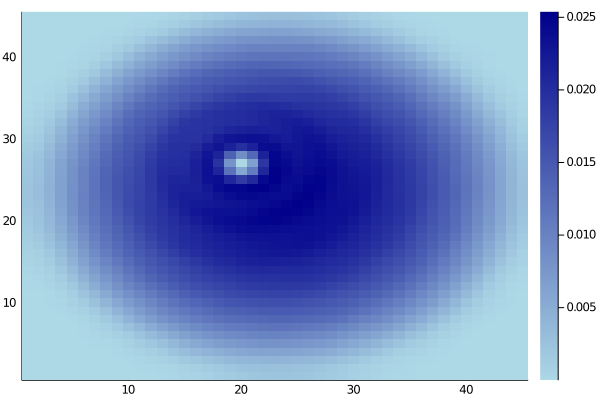

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)